$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Ejercicio práctico | Visualización y pre-procesamiento de datos}$$

_Profesor: Jesus Alvarado_

_Alumnos: Luis Revilla, Sebastian Ríos, Emilio Ochoa_



[Contexto] El dataset que se trabaja es el "Breast Cancer Wisconsin (Diagnostic) Dataset" y se utiliza comúnmente en la comunidad de aprendizaje automático para clasificación binaria. Este conjunto de datos contiene información recopilada por el Dr. William H. Wolberg del Centro de Wisconsin para la Investigación de Cáncer de Mama, que describe las características de células obtenidas de imágenes digitalizadas de muestras de aspirado con aguja fina (FNA) de masas mamarias. Las características se describen utilizando un total de 30 atributos numéricos, que se calculan a partir de las imágenes digitalizadas de las células. La variable de destino es un valor binario que indica si la muestra es benigna (valor = 0) o maligna (valor = 1).

In [ ]:
!gdown https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy

!pip -q install lazypredict

Downloading...
From: https://www.coursera.org/learn/linear-regression-r-public-health/resources/OqfHd
To: /content/OqfHd
138kB [00:00, 416kB/s]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df0 = pd.read_csv("/content/cancer_challenge_cl2.csv", index_col = "Unnamed: 0")
df0.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,-1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


# Análisis Exploratorio

In [ ]:
# Número de filas y columnas

df = df0
df.shape

(569, 31)

In [ ]:
# Agrupación para conocer el balance del atributo objetivo 'target'

df. groupby([('target')]). size()

target
0    211
1    357
5      1
dtype: int64

In [ ]:
# Se observa que hay un valor outlier, el 5, por lo que lo reemplazamos

df['target'] = np.where(df['target']== 5,np.NaN,df['target'])

In [ ]:
# Revisamos si es que hay otros valores nulos

df.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry               True
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension     True
target    

In [ ]:
# Enlistamos todas las variables/atributos del dataframe

list(df.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
# Revisamos parámetros estadísticos como la media, desviación estándar, cuartiles, etc.

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,566.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,568.000000,568.000000
mean,14.127292,19.289649,91.969033,651.370650,0.096360,0.104341,0.088799,0.048919,0.181145,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083978,0.628521
std,3.524049,4.301036,24.298981,358.395954,0.014064,0.052813,0.079720,0.038803,0.027477,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483626
min,6.981000,9.710000,43.790000,-1001.000000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,419.800000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071468,0.000000
50%,13.370000,18.840000,86.240000,546.400000,0.095870,0.092630,0.061540,0.033500,0.179250,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080050,1.000000
75%,15.780000,21.800000,104.100000,782.600000,0.105300,0.130400,0.130700,0.074000,0.195675,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092082,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# Revisamos cuantos NA tenemos para ver qué estrategia utilizaremos para tratar estos datos
df.isnull().any().sum()

3

# Pre-procesamiento

In [ ]:
# Al tratarse de pocas observaciones con NA, decidimos retirarlos del dataframe

data = df.dropna()
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,-1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [ ]:
# Agregamos un índice y verificamos que ya no hayan valores NA
data.reset_index(drop=True)
data.isnull().any().sum()

0

In [ ]:
# Revisamos el tipo de variables con los que contamos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    564 non-null    int64  
 1   mean radius              564 non-null    float64
 2   mean texture             564 non-null    float64
 3   mean perimeter           564 non-null    float64
 4   mean area                564 non-null    float64
 5   mean smoothness          564 non-null    float64
 6   mean compactness         564 non-null    float64
 7   mean concavity           564 non-null    float64
 8   mean concave points      564 non-null    float64
 9   mean symmetry            564 non-null    float64
 10  mean fractal dimension   564 non-null    float64
 11  radius error             564 non-null    float64
 12  texture error            564 non-null    float64
 13  perimeter error          564 non-null    float64
 14  area error               5

# Visualización de la data

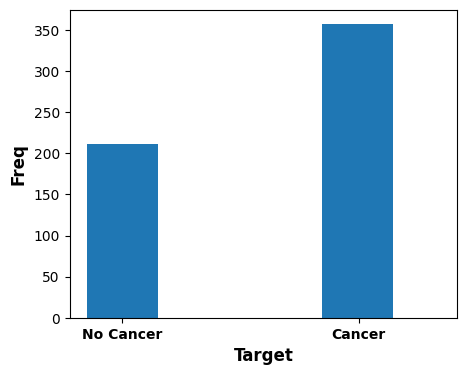

In [ ]:
# Graficamos las dos categorías del target, para ver el balance

ax = plt.subplot()
df['target'].hist(figsize=(5,4),bins=3,width=0.2, align='mid')
plt.xticks(ticks=[0.1, 0.77], labels=['No Cancer', 'Cancer'], weight='bold')
plt.xlabel('Target', fontsize=12, weight='bold')
plt.ylabel('Freq', fontsize=12, weight='bold')
ax.grid(False)
plt.show()

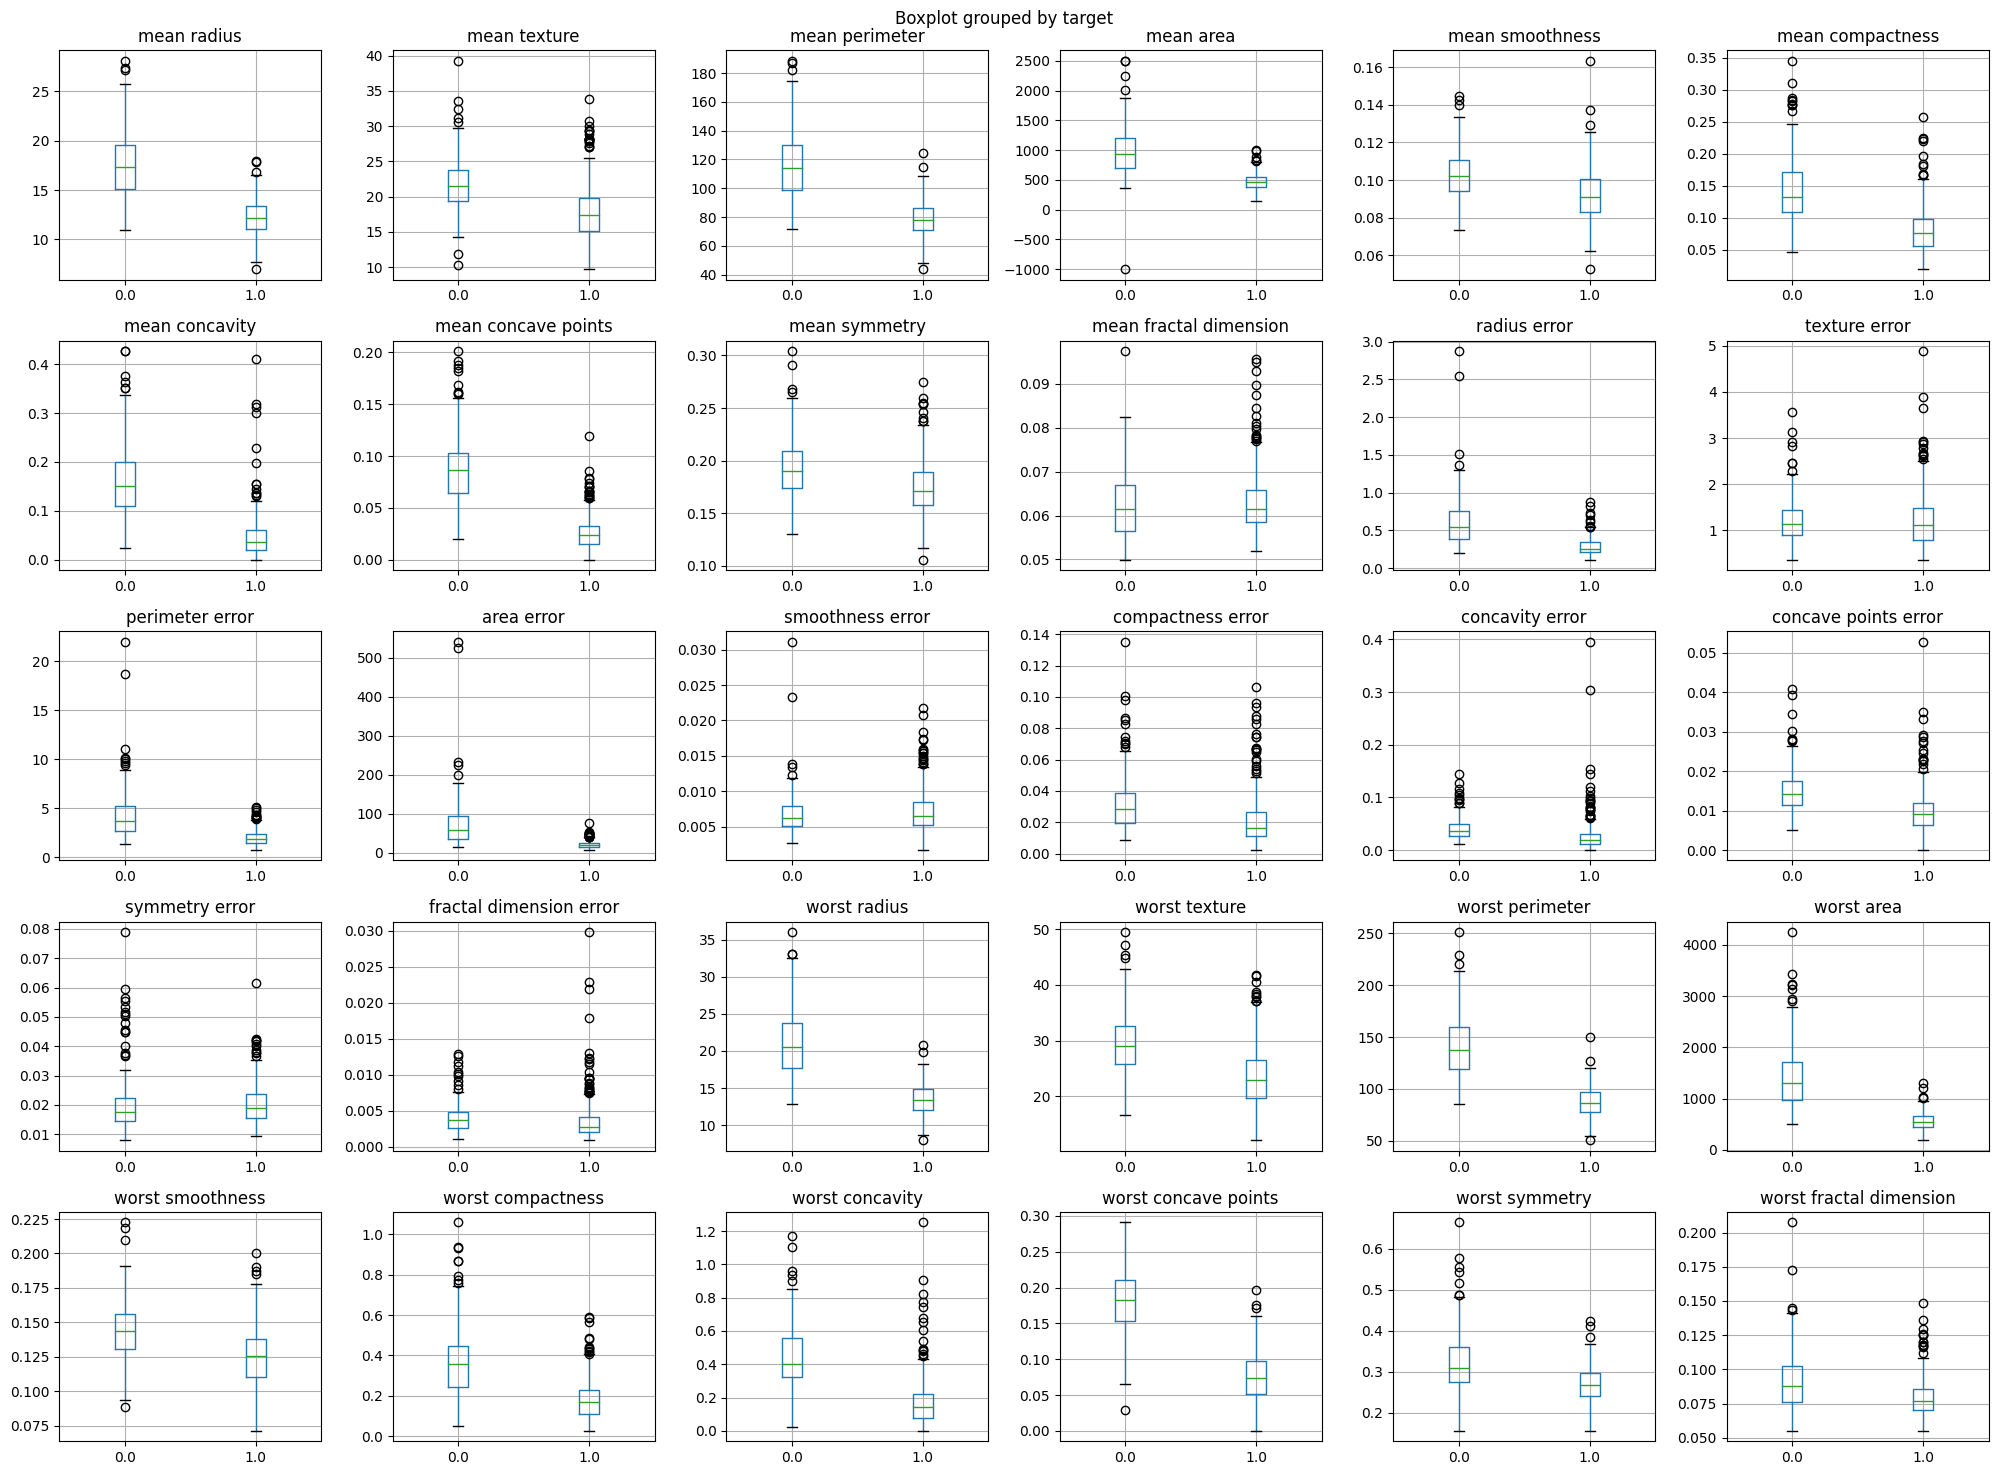

In [ ]:
# Hacemos un gráfico de cajas y bigotes para cada una de las variables respecto al target

# Variables a graficar
variables = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
             'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',             
             'mean fractal dimension', 'radius error', 'texture error', 'perimeter error',             
             'area error', 'smoothness error', 'compactness error', 'concavity error',             
             'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius',             
             'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness',             
             'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

# Graficar cajas y bigotes
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
for i, variable in enumerate(variables):
    ax = axes[i//6, i%6]
    df.boxplot(column=variable, by='target', ax=ax)
    ax.set_xlabel('')
    ax.set_title(variable, fontsize=12)
    
plt.tight_layout()
plt.show()

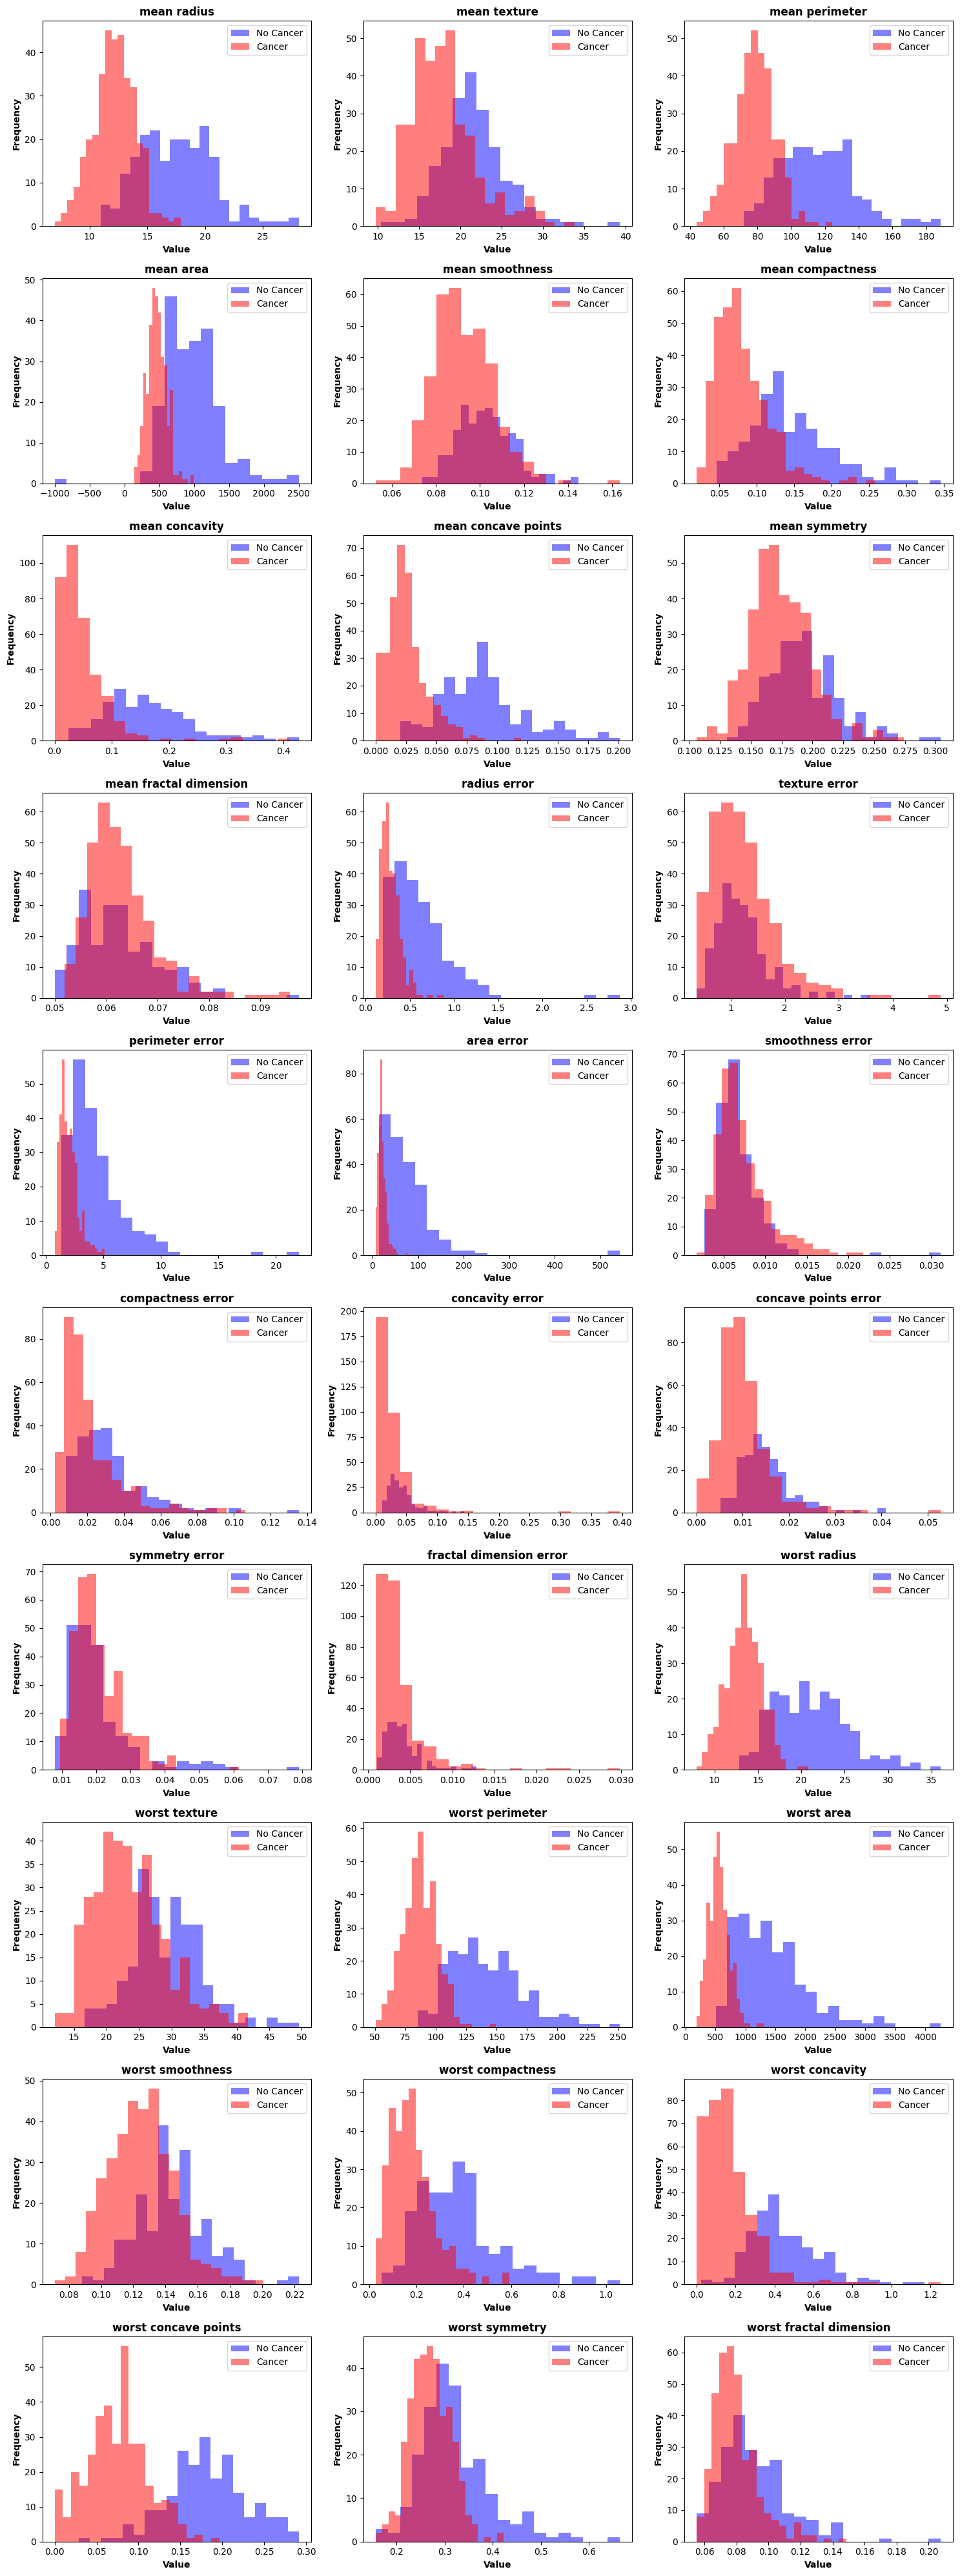

In [ ]:
# Histograma para cada variable en la lista respecto a la variable objetivo

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15,40))
for i, var in enumerate(['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 
                         'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 
                         'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 
                         'area error', 'smoothness error', 'compactness error', 'concavity error', 
                         'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 
                         'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 
                         'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']):
    row, col = divmod(i, 3)
    axs[row, col].hist(df[df['target']==0][var], alpha=0.5, bins=20, label='No Cancer', color='blue')
    axs[row, col].hist(df[df['target']==1][var], alpha=0.5, bins=20, label='Cancer', color='red')
    axs[row, col].set_title(var, fontsize=12, weight='bold')
    axs[row, col].set_xlabel('Value', fontsize=10, weight='bold')
    axs[row, col].set_ylabel('Frequency', fontsize=10, weight='bold')
    axs[row, col].legend(loc='upper right')
    
plt.tight_layout()
plt.show()

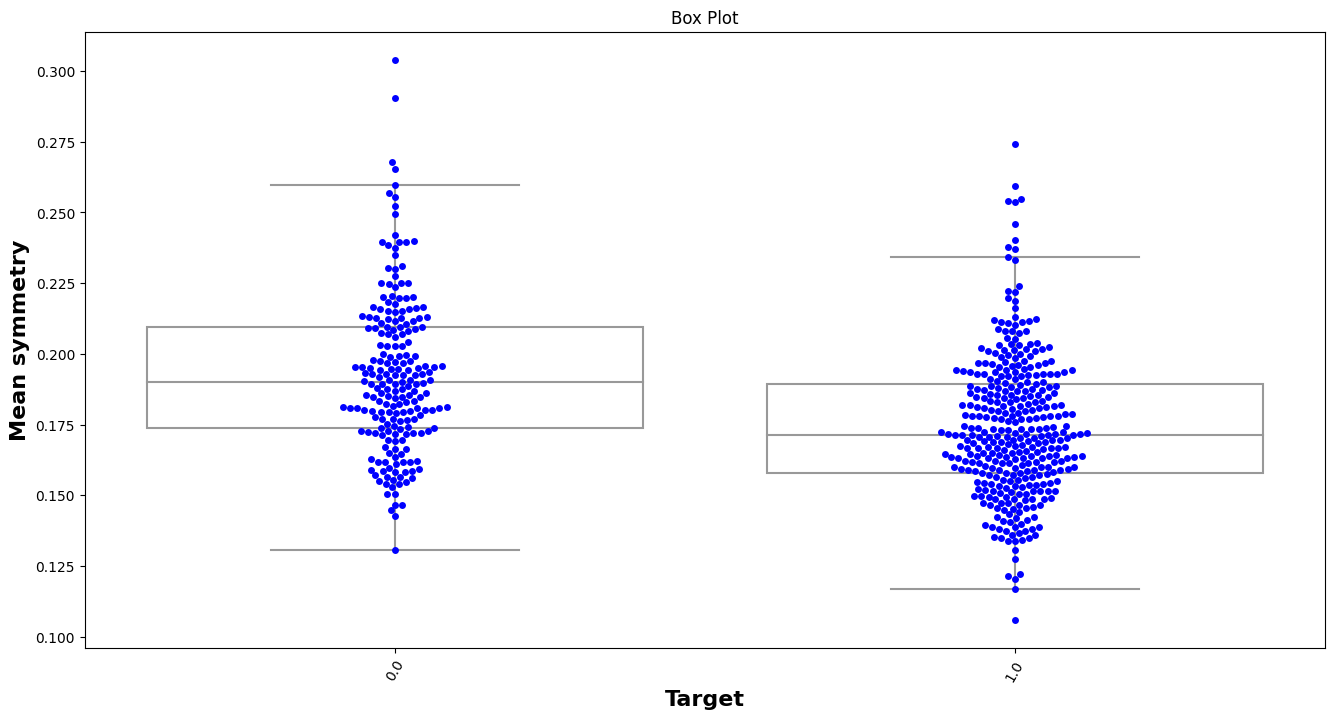

In [ ]:
# Probamos otro tipo de gráfico en comparativa categórica del target

fig = plt.figure(figsize=(16, 8))
#ax = sns.boxplot(x='PLANT', y='docking score', data=data)

###
ax = sns.boxplot(x='target', y='mean symmetry', data=data, ax=fig.add_subplot(1,1,1), showfliers=False, color='white')
sns.swarmplot(x='target', y='mean symmetry', data=data, ax=ax, color='blue', size=5)
###

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Agregar título de gráfica y etiquetas de eje
plt.title('Box Plot')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('Target', fontsize=16, fontweight='bold')
plt.ylabel('Mean symmetry', rotation=90, fontsize=16, fontweight='bold')

# Mostrar la gráfica
plt.show()
     

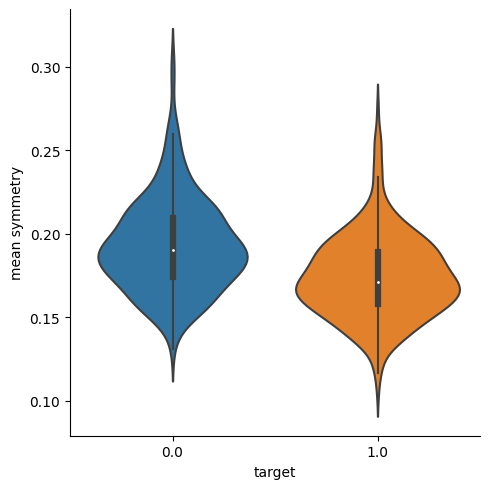

In [ ]:
sns.catplot(x = "target", y = "mean symmetry", data = data, kind = "violin")
plt.show();

# Procesamiento y Modelamiento

In [ ]:
# Normalizar las columnas
scaler = StandardScaler()

X = data.drop(['target', 'index'], axis=1)
y = data['target']

data_normalized = scaler.fit_transform(X)

# Convertir el resultado a un nuevo dataframe
X = pd.DataFrame(data_normalized, columns=X.columns)

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.10,-2.07,1.27,-4.61,1.56,3.27,2.65,2.53,2.21,2.25,...,1.88,-1.36,2.30,2.00,1.30,2.61,2.10,2.29,2.74,1.93
1,1.83,-0.35,1.68,1.88,-0.83,-0.49,-0.03,0.54,0.00,-0.87,...,1.80,-0.37,1.53,1.89,-0.38,-0.43,-0.15,1.08,-0.24,0.28
2,1.58,0.46,1.57,1.54,0.94,1.05,1.36,2.03,0.94,-0.40,...,1.51,-0.02,1.35,1.45,0.52,1.08,0.85,1.95,1.15,0.20
3,-0.77,0.25,-0.59,-0.74,3.28,3.39,1.91,1.45,2.86,4.90,...,-0.28,0.13,-0.25,-0.55,3.39,3.88,1.98,2.17,6.03,4.92
4,1.75,-1.15,1.78,1.80,0.28,0.53,1.37,1.42,-0.01,-0.57,...,1.30,-1.46,1.34,1.22,0.22,-0.32,0.61,0.73,-0.87,-0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2.11,0.72,2.06,2.31,1.04,0.21,1.94,2.32,-0.31,-0.94,...,1.90,0.12,1.75,2.01,0.37,-0.28,0.66,1.63,-1.36,-0.71
560,1.70,2.08,1.61,1.70,0.10,-0.02,0.69,1.26,-0.22,-1.06,...,1.53,2.04,1.42,1.49,-0.69,-0.40,0.23,0.73,-0.53,-0.98
561,0.70,2.04,0.67,0.58,-0.84,-0.04,0.04,0.10,-0.81,-0.90,...,0.56,1.37,0.58,0.43,-0.81,0.35,0.32,0.41,-1.10,-0.32
562,1.84,2.33,1.98,1.71,1.52,3.26,3.29,2.65,2.13,1.04,...,1.96,2.23,2.30,1.65,1.43,3.89,3.19,2.29,1.91,2.21


In [ ]:
# Importar el clasificador LazyClassifier y la función train_test_split del paquete sklearn.model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123, test_size=0.2)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 16.33it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.97,0.97,0.97,0.97,0.03
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.17
LogisticRegression,0.97,0.97,0.97,0.97,0.05
LinearSVC,0.96,0.96,0.96,0.96,0.04
SGDClassifier,0.96,0.96,0.96,0.96,0.02
LabelPropagation,0.96,0.96,0.96,0.96,0.04
LabelSpreading,0.96,0.96,0.96,0.96,0.04
XGBClassifier,0.96,0.95,0.95,0.96,0.15
Perceptron,0.96,0.95,0.95,0.96,0.02


In [ ]:
# Ahora probamos con PCA

pca = PCA(n_components = 4)
pca.fit(X)
X_pca = pca.transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

pca_df

,PC1,PC2,PC3,PC4
0,8.01,3.19,-1.29,3.45
1,2.35,-3.78,-0.50,1.11
2,5.71,-1.11,-0.53,0.92
3,7.17,10.20,-3.26,0.15
4,3.90,-1.97,1.42,2.93
...,...,...,...,...
559,6.39,-3.60,2.49,1.19
560,3.76,-3.60,2.10,-2.50
561,1.24,-1.91,0.57,-2.07
562,10.36,1.59,-1.87,-2.33


In [ ]:
# Repetimos el paso anterior, para ver los resultados con PCA

X_train, X_test, y_train, y_test = train_test_split(pca_df, y, random_state =123, test_size=0.2)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 25.39it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.96,0.97,0.97,0.96,0.04
XGBClassifier,0.96,0.97,0.97,0.96,0.06
RandomForestClassifier,0.96,0.97,0.97,0.96,0.22
NearestCentroid,0.96,0.96,0.96,0.96,0.02
LGBMClassifier,0.96,0.96,0.96,0.96,0.06
LogisticRegression,0.96,0.95,0.95,0.96,0.02
LinearSVC,0.96,0.95,0.95,0.96,0.03
LinearDiscriminantAnalysis,0.96,0.95,0.95,0.96,0.02
RidgeClassifier,0.96,0.95,0.95,0.96,0.02
